In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(f"Pandas version is {pd.__version__}")
print(f"Numpy version is {np.__version__}")
print(f"Seaborn version is {sns.__version__}")

Pandas version is 1.0.4
Numpy version is 1.18.5
Seaborn version is 0.10.1


## Prepare Data for plotting

In [3]:
df=pd.read_csv("/home/chaudha4/Projects/pyprojects/python-projects/data_analysis/ch04-time-series-visualizer/fcc-forum-pageviews.csv",
              parse_dates=True,
              index_col=0)

#print(df.info())
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


The first quartile, denoted by Q1 , is the median of the lower half of the data set. This means that about 25% of the numbers in the data set lie below Q1 and about 75% lie above Q1 . The third quartile, denoted by Q3 , is the median of the upper half of the data set.

In [4]:
df1 = df [(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]

In [54]:
# Explicitly copy so that pandas knows that we don't intend to update df. Otherwise you get SettingWithCopyWarning
#df2 = df
df2 = df1.copy()
df2.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [55]:
df2.index

DatetimeIndex(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-14', '2016-06-15',
               ...
               '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21',
               '2019-11-23', '2019-11-24', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1238, freq=None)

In [56]:
# Convenience method for frequency conversion and resampling of time series. Object must 
# have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass 
#datetime-like values to the on or level keyword.

df1.resample('M').sum().head() # Group by Months and add them up.


,value
date,
2016-05-31,97162
2016-06-30,415627
2016-07-31,675071
2016-08-31,962525
2016-09-30,1244306


In [57]:
df2 = df2.resample('M').mean() # Group by Months and calculate average.
df2.head()

,value
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667


In [58]:
df2["year"] = df2.index.year
df2["month"] = df2.index.month
df2.sort_values(by=['year', 'month'])
df2.head()

,value,year,month
date,,,
2016-05-31,19432.400000,2016,5
2016-06-30,21875.105263,2016,6
2016-07-31,24109.678571,2016,7
2016-08-31,31049.193548,2016,8
2016-09-30,41476.866667,2016,9


In [59]:
# One way to translate data
df3 = df2.copy()
df3.month = df3.month.replace({1: 'January', 
                   2: 'February', 
                   3: 'March', 
                   4: 'April', 
                   5: 'May', 
                   6: 'June', 
                   7: 'July', 
                   8: 'August', 
                   9: 'September', 
                   10:'October', 
                   11:'November', 
                   12:'December'})
df3.head()

,value,year,month
date,,,
2016-05-31,19432.400000,2016,May
2016-06-30,21875.105263,2016,June
2016-07-31,24109.678571,2016,July
2016-08-31,31049.193548,2016,August
2016-09-30,41476.866667,2016,September


In [52]:
# Another way to translate data

mm = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2.month = df2.month.apply(lambda x: mm[x-1])
df2.head()

,value,year,month
date,,,
2016-05-31,19432.400000,2016,May
2016-06-30,21875.105263,2016,June
2016-07-31,24109.678571,2016,July
2016-08-31,31049.193548,2016,August
2016-09-30,41476.866667,2016,September


In [14]:
# Another way to add year and months
df3 = df1.copy() 
df3.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [15]:
# Convert the index into a new column
df3.reset_index(inplace=True)
df3.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [16]:
df3['year'] = [dd.year for dd in df3.date]
df3.head()

,date,value,year
0,2016-05-19,19736,2016
1,2016-05-26,18060,2016
2,2016-05-27,19997,2016
3,2016-05-28,19044,2016
4,2016-05-29,20325,2016


In [17]:
df3['month'] = [dd.strftime('%b') for dd in df3.date]
df3.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


## Plot the data

### Using Pandas Plot

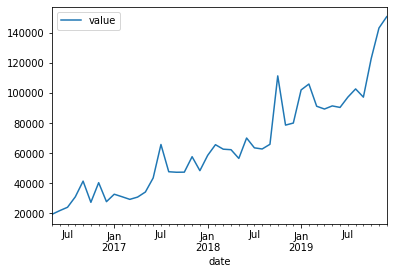

In [76]:
df2.plot(y="value")

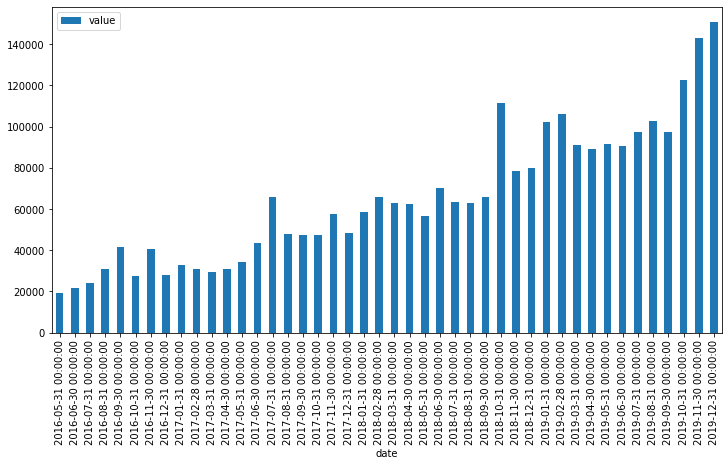

In [88]:
df2.plot.bar(y="value", figsize=(12, 6))

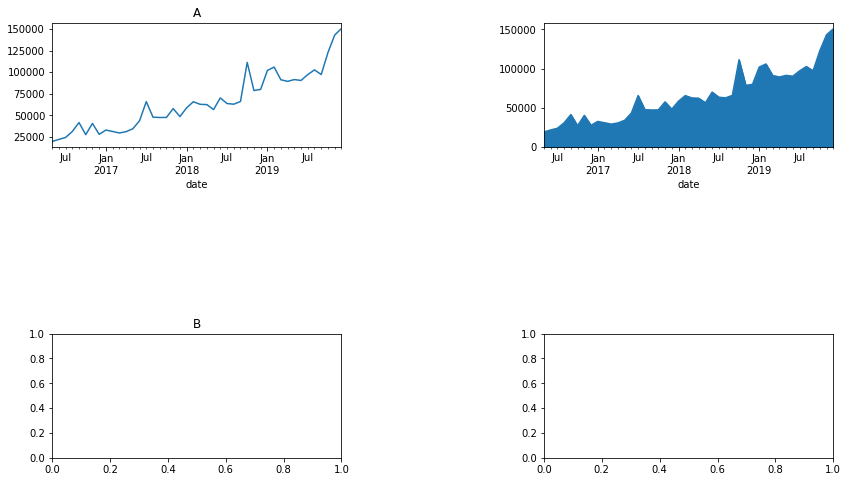

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.7, hspace=1.5)

df2['value'].plot(ax=axes[0, 0])
axes[0, 0].set_title('A')

df2['value'].plot(ax=axes[0, 1], kind="area")
axes[1, 0].set_title('B')

#axes[1, 0].figure.set_size_inches(14,8)
fig.set_size_inches(14,8)


### Using Seaborn

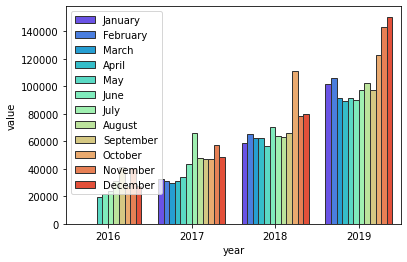

In [214]:
months = ['January', 'February', 'March', 'April', 
          'May', 'June', 'July', 'August', 
          'September', 'October', 'November', 'December']


ax = sns.barplot(x=df2["year"], y=df2.value, data=df2, hue=df2.month, hue_order=months, 
                 edgecolor=".2", palette="rainbow")

ax.legend()
#ax.legend(months, title='Months')